# Project: Investigate a Dataset (No-showappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [4]:
#import statements for all of the packages that i plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-colorblind')
params = {'legend.fontsize': 'x-large','figure.figsize': (15, 5),'axes.labelsize': 'x-large','axes.titlesize':'x-large',
          'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wrangling'></a>
#### Load the data and print out a few lines.


In [5]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
### Perform operations to inspect data types and look for instances of missing or possibly errant data.

<a id='wrangling'></a>
#### Check for Duplicates and Nan Values

In [6]:
df.duplicated().sum() , df.isnull().sum()

(0,
 PatientId         0
 AppointmentID     0
 Gender            0
 ScheduledDay      0
 AppointmentDay    0
 Age               0
 Neighbourhood     0
 Scholarship       0
 Hipertension      0
 Diabetes          0
 Alcoholism        0
 Handcap           0
 SMS_received      0
 No-show           0
 dtype: int64)

#### There are no N/A values, which is a good thing.
#### There are duplicated values that may cause problems during data analysis and affect the accuracy of the process. In this data analysis process, I think the best way to deal with it is to delete it.

<a id='wrangling'></a>
### Show Data Statistics

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### There are limitations here in the values of the patients' ages, as it is illogical that the age is less than zero, so it is necessary to treat these values

#### Show information about the data columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Tha data for [ScheduledDay and AppointmentDay] columns need to type change.

<a id='limitations'></a>
## Limitations

 <a id='limitations'></a>
 ### we can see some problems in the data 
 #### 1- Negative value in the age
 #### 2- Too many value in  Age .
 #### 3- Some data need to type change ( ScheduledDay and AppointmentDay Columns data)
 #### 4- Need to calculate the dalay time between the scheduledday and appointmentday.
 #### 5- Need to Rename the no-show column and change its data type.

<a id='wrangling'></a>
#### Remove unnecessary columns [PatientId,AppointmentID] from the Dataframe.

In [9]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

<a id='wrangling'></a>
#### Rename the no-show column to show , and change the values in the data set (1 for show , 0 for no show)

In [10]:
df.rename(columns={'No-show':'show'},inplace=True)
df.show=df.show.map({'Yes':0,'No':1})

<a id='wrangling'></a>
#### Remove Duplicates

In [11]:
df.drop_duplicates(inplace=True,ignore_index=True)

#### Fix age with negative values

In [12]:
df=df[df.Age>=0]

#### Change data type for [ScheduledDay and AppointmentDay] columns

In [13]:
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay.dt.strftime('%Y-%m-%d'))

df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.ScheduledDay=pd.to_datetime(df.ScheduledDay.dt.strftime('%Y-%m-%d'))

### Checking the corrolation to see the realtion between variables

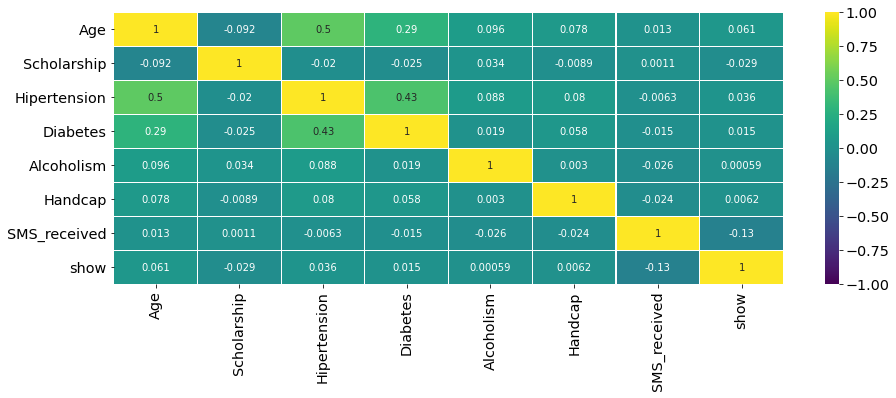

In [14]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "viridis", linewidths=0.1, annot=True);

## As shown, there is a strong relation between Diabetes, Hipertension,Alcoholism and Age

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does gender affect the number of people who show up ?)
#### Creat  for the patients who show

In [15]:
df_show=df[df.show==1]

[Text(0.5, 1.0, 'Male and Female Percentage')]

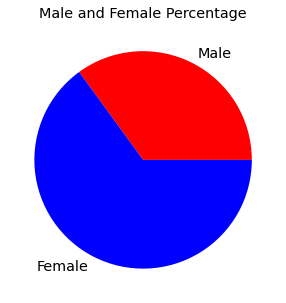

In [18]:
fig, ax = plt.subplots()
plt.pie([df.Gender[df.Gender=='M'].count(),df.Gender[df.Gender=='F'].count()], labels = ['Male','Female'],colors=['r','b'])
ax.set(title='Male and Female Percentage')

#### Determine the percentage of male who show to all the male patients

In [36]:
male_show_percent=df_show.Gender[df.Gender=='M'].count() / df.Gender[df.Gender=='M'].count()

#### Determine the percentage of female who show to all the female patients

In [37]:
female_show_percent=df_show.Gender[df.Gender=='F'].count() / df.Gender[df.Gender=='F'].count()

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Show proportion'),
 (0.0, 1.0),
 Text(0.5, 1.0, 'Does gender affect the number who show up ?\n')]

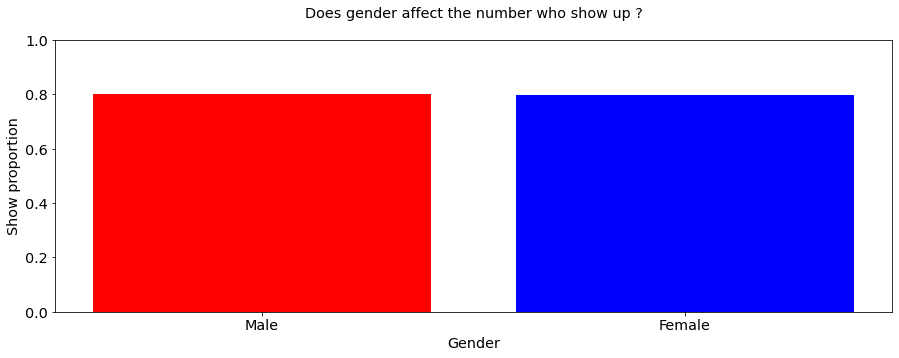

In [19]:
fig, ax = plt.subplots()
ax.bar(['Male','Female'], [male_show_percent,female_show_percent],color=['r','b'])
ax.set(xlabel='Gender',ylabel='Show proportion',ylim=(0,1),title='Does gender affect the number who show up ?\n')

######                        The Result from this exploratory : The gender did not affect the attendance.

### Research Question 2  (Does delay time between ScheduledDay and AppointmentDay affect patient attendance?)

#### create new columns for the Delay time.(in days)

In [45]:
df['delay']=(df.AppointmentDay - df.ScheduledDay).dt.days

#### Clean Delay column values by removing negative values :

In [21]:
df=df[df.delay>=0]

In [46]:
df.nunique()

Gender              2
ScheduledDay      111
AppointmentDay     27
Age               103
Neighbourhood      81
Scholarship         2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
show                2
delay             129
delay_range         5
age_range           4
day                 6
month               3
dtype: int64

#### As shown , there are 129 unique Values for delay , so i will creat a new column for Delay_Ranges to make my exploratory much easier and clearer.

In [23]:
df['delay_range']=pd.cut(df.delay,[-1,10,20,40,60,180],labels=['0:10','10:20','20:40','40:60','60:180'])

[Text(0.5, 0, 'Delay_Range'),
 Text(0, 0.5, 'Number of Show Patients'),
 Text(0.5, 1.0, 'Affect of delay time on Paitents attendance')]

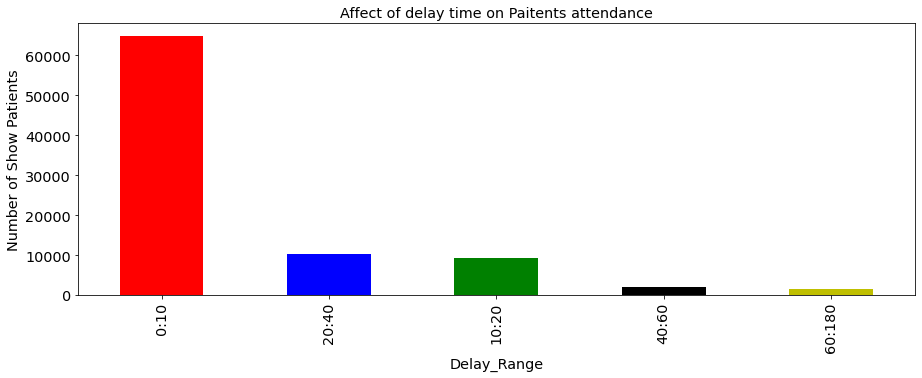

In [38]:
fig, ax = plt.subplots()
df[df.show==1].delay_range.value_counts().plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Delay_Range',ylabel='Number of Show Patients',title='Affect of delay time on Paitents attendance')

#### Most patients showed up on ScheduledDay or within 10 days of the ScheduledDay.

[Text(0.5, 0, 'Delay_Range'),
 Text(0, 0.5, 'Percentage of Show Patients to all patients'),
 (0.0, 1.0),
 Text(0.5, 1.0, 'Affect of delay time on Paitents attendance')]

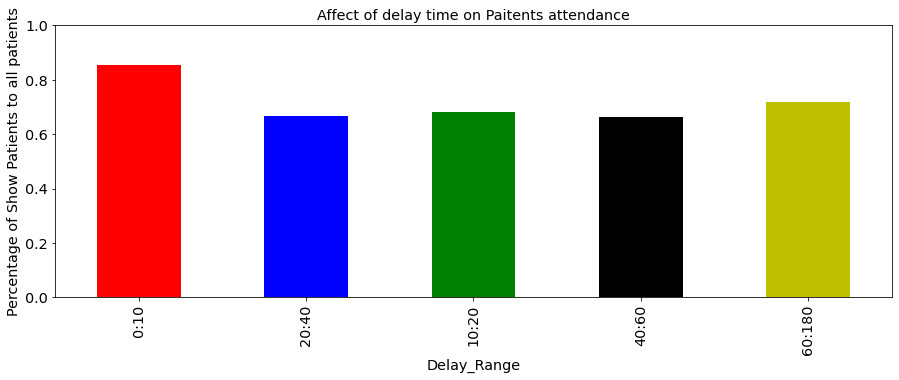

In [25]:
fig, ax = plt.subplots()
(df_show.delay_range.value_counts() / df.delay_range.value_counts()).plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Delay_Range',ylabel='Percentage of Show Patients to all patients',ylim=(0,1),title='Affect of delay time on Paitents attendance')

#### when the delay time increases than 10 days, the attendance is relatively reduced.

### Research Question 3  (Does Age affect patient attendance?)

In [26]:
df['age_range']=pd.cut(df.Age,[-1,20,40,60,116],labels=['0:20','20:40','40:60','60:115'])

[Text(0.5, 0, 'Age_Range'),
 Text(0, 0.5, 'Number of Show Patients'),
 Text(0.5, 1.0, 'Affect of patient age on Paitents attendance')]

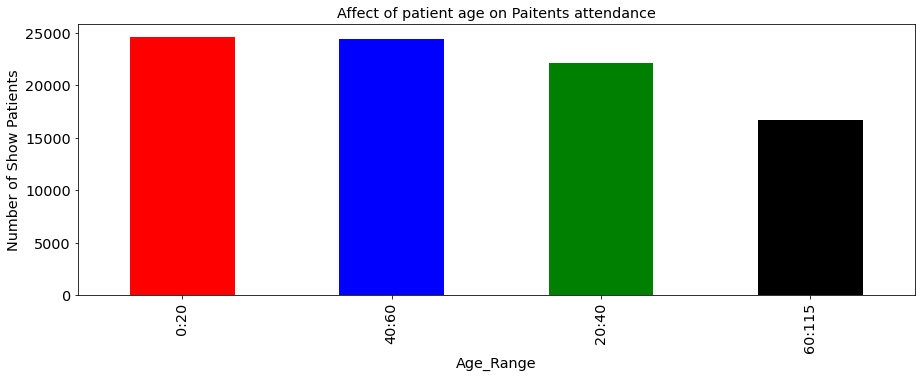

In [39]:
fg,ax=plt.subplots()
df[df.show==1].age_range.value_counts().plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Age_Range',ylabel='Number of Show Patients',title='Affect of patient age on Paitents attendance')

#### As it was shown that the patients' ages include a large range of ages, but the least present are the group over 60 years old

[Text(0.5, 0, 'Age_Range'),
 Text(0, 0.5, 'Percentage of Show Patients to all patients'),
 (0.0, 1.0),
 Text(0.5, 1.0, 'Affect of patient age on Paitents attendance')]

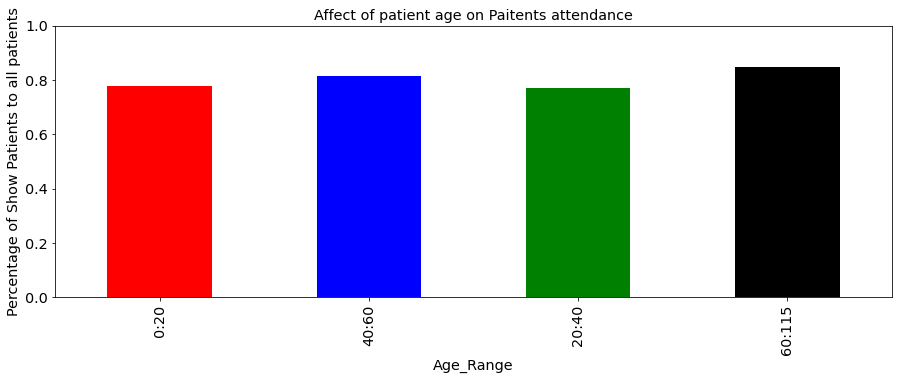

In [40]:
fg,ax=plt.subplots()
(df[df.show==1].age_range.value_counts() / df.age_range.value_counts()).plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Age_Range',ylabel='Percentage of Show Patients to all patients',ylim=(0,1),title='Affect of patient age on Paitents attendance')

#### As shown in the plot . There is no clear difference about the effect of age on the patient’s attendance.

### Research Question 4 (Does the date of appointment whether it was a day in the week or a month affect patient attendance or not?)

[Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Number of Show Patients'),
 Text(0.5, 1.0, 'Effect of day of week on Paitents attendance')]

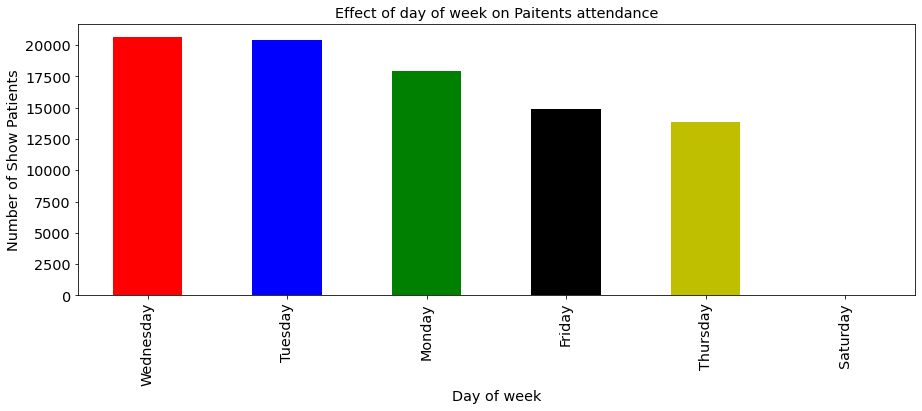

In [47]:
df['day']=df.AppointmentDay.dt.day_name()
df['month']=df.AppointmentDay.dt.month_name()
fg,ax=plt.subplots()
df[df.show==1].day.value_counts().plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Day of week',ylabel='Number of Show Patients',title='Effect of day of week on Paitents attendance')

#### There are no appointments on Sunday, and the number of appointments on Saturday is very few compared to the rest of the days, Tuesday and Wednesday are the most frequent days for patients.

[Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'percentage of Show Patients to all patients'),
 (0.0, 1.0),
 Text(0.5, 1.0, 'Effect of day of week on Paitents attendance')]

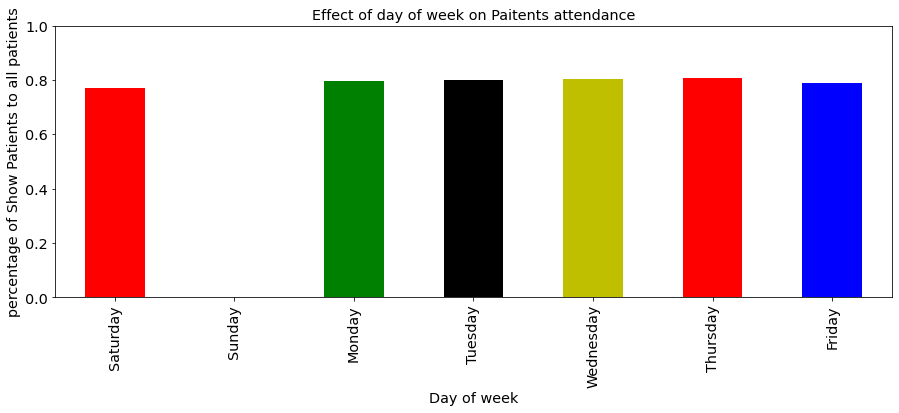

In [48]:
fg,ax=plt.subplots()
days = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
(df[df.show==1].day.value_counts() / df.day.value_counts()).reindex(days).plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='Day of week',ylabel='percentage of Show Patients to all patients',ylim=(0,1),title='Effect of day of week on Paitents attendance')


#### Approximately , Appointmentday as aday of week doesnt affect on the attendance of patient or not

[Text(0.5, 0, 'month'),
 Text(0, 0.5, 'Number of show patients'),
 Text(0.5, 1.0, 'Effect of month on Paitents attendance')]

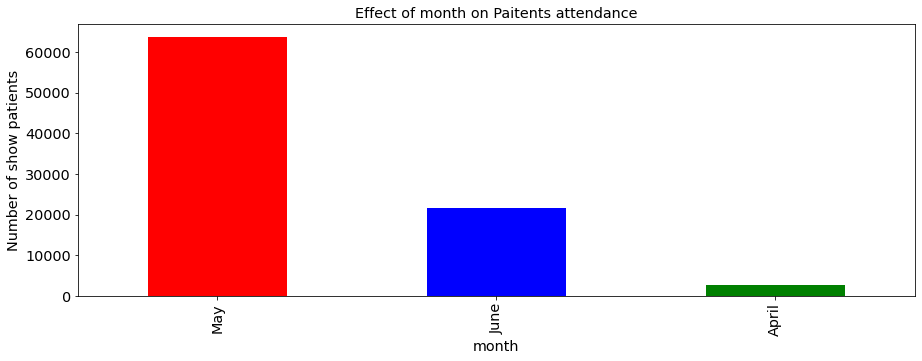

In [49]:
fig,ax=plt.subplots()
df[df.show==1].month.value_counts().plot(kind='bar',color=['r','b','g','black','y'])
ax.set(xlabel='month',ylabel='Number of show patients',title='Effect of month on Paitents attendance')

#### All appointments are limited to three months, and the most frequent month for patients is May.

### Research Question 5  (Does age affect the number of patients with Hipertension,Diabetes , or Alcoholism?)

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, "The ratio of the patient's infection with a Hipertension to the number of patients"),
 (0.0, 90.0),
 Text(0.5, 1.0, 'is there a relation between Age and Hipertension?')]

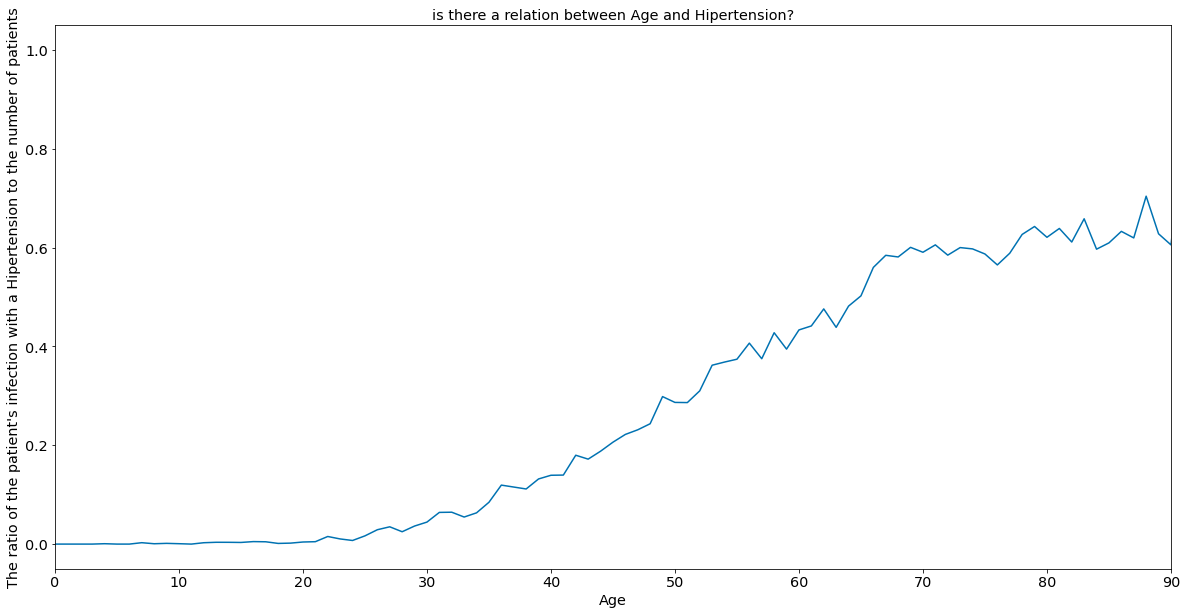

In [32]:
feg,ax=plt.subplots()
(df.groupby(['Age']).sum().Hipertension / df.groupby(['Age']).count().Hipertension).plot(figsize=(20,10))
ax.set(xlabel='Age',ylabel='The ratio of the patient\'s infection with a Hipertension to the number of patients',xlim=(0,90),title='is there a relation between Age and Hipertension?')

#### As shown, the older the patient, the greater the likelihood that he will have Hipertension

[Text(0.5, 0, 'age_range'),
 Text(0, 0.5, 'Number of patients with Hipertension'),
 Text(0.5, 1.0, 'is there a relation between Age and Hipertension?')]

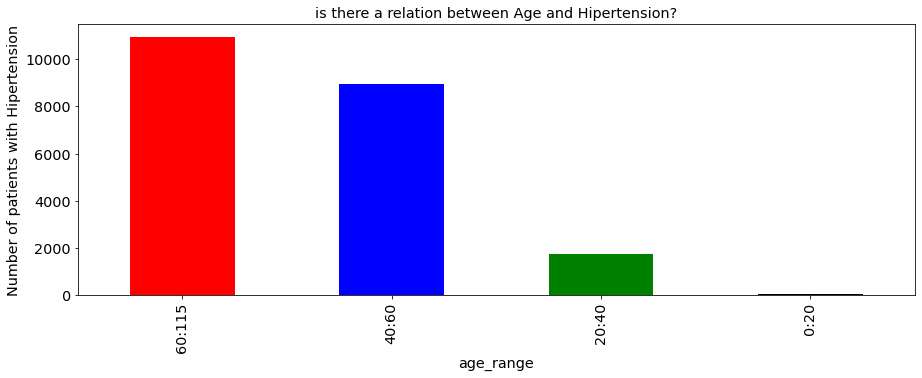

In [33]:
fig,ax=plt.subplots()
df[df.Hipertension==1].age_range.value_counts().plot(kind='bar',color=['r','b','g','black'])
ax.set(xlabel='age_range',ylabel='Number of patients with Hipertension',title='is there a relation between Age and Hipertension?')

#### As it is clear, age has a strong effect on the number of patients with a Hipertension, the higher the age, the higher the number of patients with Hipertension. (The most common age group affected by the disease is 60:115)

[Text(0.5, 0, 'age_range'),
 Text(0, 0.5, 'Number of patients with Diabetes'),
 Text(0.5, 1.0, 'is there a relation between Age and Diabetes?')]

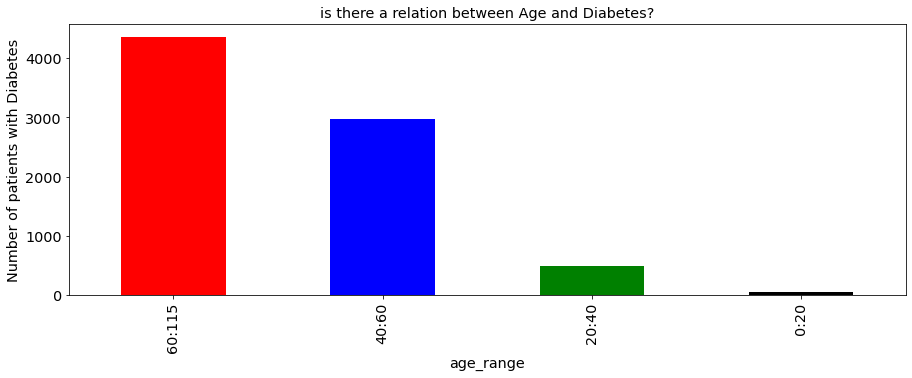

In [34]:
feg,ax=plt.subplots()
df[df.Diabetes==1].age_range.value_counts().plot(kind='bar',color=['r','b','g','black'])
ax.set(xlabel='age_range',ylabel='Number of patients with Diabetes',title='is there a relation between Age and Diabetes?')

#### As it is clear, age has a strong effect on the number of patients with a Diabetes, the higher the age, the higher the number of patients with Diabetes.(The most common age group affected by the disease is 60:115)

[Text(0.5, 0, 'age_range'),
 Text(0, 0.5, 'Number of patients with Alcoholism'),
 Text(0.5, 1.0, 'is there a relation between Age and Alcoholism?')]

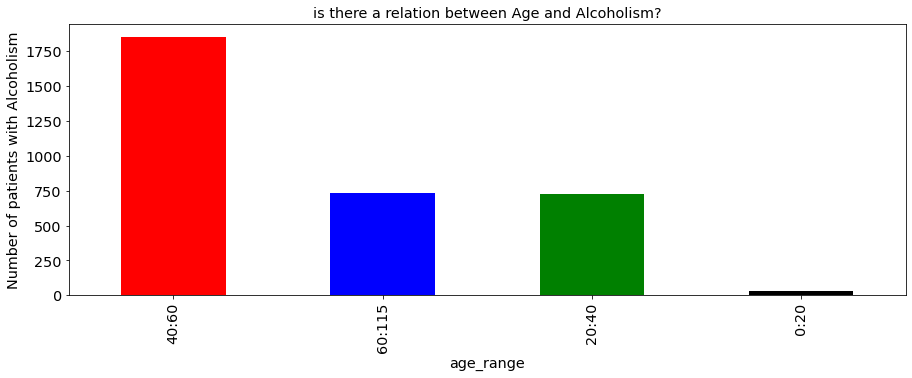

In [35]:
feg,ax=plt.subplots()
df[df.Alcoholism==1].age_range.value_counts().plot(kind='bar',color=['r','b','g','black'])
ax.set(xlabel='age_range',ylabel='Number of patients with Alcoholism',title='is there a relation between Age and Alcoholism?')

#### As it is clear, age has a strong effect on the number of patients with a Alcoholism.(The most common age group affected by the disease is 40:60)

<a id='conclusions'></a>
## Conclusions
>First the data has 35 percent in it from male patients and 65 percent from female patients.
>
> The gender did not affect the attendance of patients or not.
>
> Most patients showed up on ScheduledDay or within 10 days of the ScheduledDay.
>
> when the delay time increases than 10 days, the attendance probability is relatively reduced.
>
>The patients' ages include a large range of ages, but the least present are the group over 60 years old
>
>There is no clear difference about the effect of age on the patient’s attendance.
>
>There are no appointments on Sunday, and the number of appointments on Saturday is very few compared to the rest of the days, Tuesday and Wednesday are the most frequent days for patients.
>
>Approximately , Appointmentday as aday of week doesnt affect on the attendance of patient or not
>
>All appointments are limited to three months, and the most frequent month for patients is May.
>
>Age has a strong effect on the number of patients with a Hipertension,Diabetes , or Alcoholism, the higher the age, the higher the number of patients with Hipertension.
>